In [436]:
# import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set up global variables
COLORS = ['#debcff', '#ffadad', '#ffa7dc', '#ffd6a5', '#fdffb6', '#96e8ff', '#caffbf', '#bdb2ff', '#a0c4ff', '#ffc6ff']

# load multiple csv's, add a new column to each csv to distinguish the corresponding cities and then combine csv's into one

In [314]:
# load csvs 
city1_data = pd.read_csv('amsterdam_weekdays.csv')
city2_data = pd.read_csv('athens_weekdays.csv')
city3_data = pd.read_csv('barcelona_weekdays.csv')
city4_data = pd.read_csv('berlin_weekdays.csv')
city5_data = pd.read_csv('budapest_weekdays.csv')
city6_data = pd.read_csv('lisbon_weekdays.csv')
city7_data = pd.read_csv('london_weekdays.csv')
city8_data = pd.read_csv('paris_weekdays.csv')
city9_data = pd.read_csv('rome_weekdays.csv')
city10_data = pd.read_csv('vienna_weekdays.csv')

# Add in new city column to each csv with corresponding city names
city1_data = city1_data.assign(city='amsterdam')
city2_data = city2_data.assign(city='athens')
city3_data = city3_data.assign(city='barcelona')
city4_data = city4_data.assign(city='berlin')
city5_data = city5_data.assign(city='budapest')
city6_data = city6_data.assign(city='lisbon')
city7_data = city7_data.assign(city='london')
city8_data = city8_data.assign(city='paris')
city9_data = city9_data.assign(city='rome')
city10_data = city10_data.assign(city='vienna')

# combine all files into one csv
allcity_data = pd.concat([city1_data, city2_data, city3_data, city4_data, city5_data, city6_data, city7_data, city8_data, city9_data, city10_data], ignore_index=True)

# drop unnecessary columns
allcity_data.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat'], axis=1, inplace=True)

# save new csv called allcity.csv
allcity_data.to_csv('allcity.csv')


In [315]:
#read new csv
allcity_data = pd.read_csv('allcity.csv')

In [316]:
# drop unnecessary columns
#allcity_data.drop(['Unnamed: 0.1', 'Unnamed: 0','attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat'], axis=1, inplace=True)

In [317]:
# reorder csv to have the city column at the beginning
allcity_data = allcity_data[['city', 'realSum', 'room_type', 'room_shared','room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']]

In [318]:
allcity_data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,275.681904,3.175529,0.293529,0.358745,9.389176,92.586549,1.165725,3.160597,0.680994
std,354.279644,1.308675,0.455388,0.479642,0.954920,8.964563,0.634562,2.385645,0.849603
min,37.129295,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015059,0.003944
25%,145.168856,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.433281,0.250707
50%,207.148849,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.591957,0.415916
75%,311.390202,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.226353,0.742088
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,22.617451,13.314108


In [319]:
allcity_data.head()

,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,amsterdam,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380
1,amsterdam,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404
2,amsterdam,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621
3,amsterdam,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876
4,amsterdam,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693


In [320]:
allcity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        25500 non-null  object 
 1   realSum                     25500 non-null  float64
 2   room_type                   25500 non-null  object 
 3   room_shared                 25500 non-null  bool   
 4   room_private                25500 non-null  bool   
 5   person_capacity             25500 non-null  float64
 6   host_is_superhost           25500 non-null  bool   
 7   multi                       25500 non-null  int64  
 8   biz                         25500 non-null  int64  
 9   cleanliness_rating          25500 non-null  float64
 10  guest_satisfaction_overall  25500 non-null  float64
 11  bedrooms                    25500 non-null  int64  
 12  dist                        25500 non-null  float64
 13  metro_dist                  255

In [321]:
allcity_data['city'].value_counts()

city
london       4614
rome         4492
paris        3130
lisbon       2857
athens       2653
budapest     2074
vienna       1738
barcelona    1555
berlin       1284
amsterdam    1103
Name: count, dtype: int64

In [322]:
allcity_data.isna().sum()

city                          0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
dtype: int64

In [323]:
allcity_data.duplicated().sum()

np.int64(0)

### Superhost and nonsuperhost breakdown

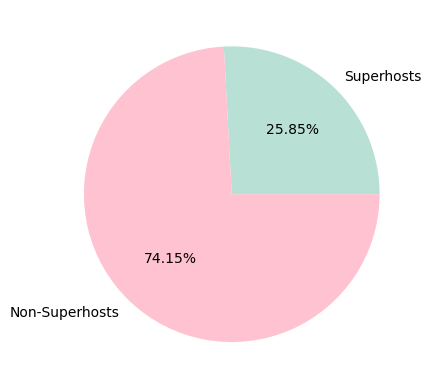

In [324]:
super_host_df = allcity_data.query('host_is_superhost == True')
plain_host_df = allcity_data.query('host_is_superhost == False')

total_host = len(allcity_data)
total_super_host = len(super_host_df)
total_plain_host = len(plain_host_df)

assert(total_super_host + total_plain_host == total_host)

values = [total_super_host, total_plain_host]
labels = ['Superhosts', 'Non-Superhosts']

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.2f%%', colors=['#b8e0d4', '#ffc2d1'])
plt.show()

### Superhost breakdown per city

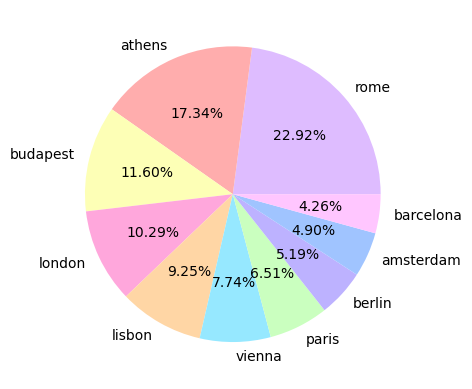

In [325]:
# get percentage of superhost in each city 
city_superhost = superhost_t['city'].value_counts(normalize=True).mul(100).round(2)

# separates city and percentages
values = city_superhost.array
labels = city_superhost.index

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.2f%%', colors=COLORS)
plt.show()





### How many are not?

In [326]:
not_superhost=allcity_data['host_is_superhost'].value_counts()[False]
print(not_superhost)

18908


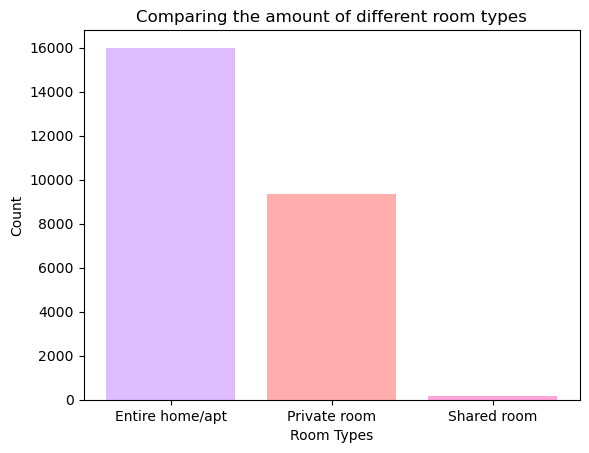

In [452]:
# panda's plotting function
# rooms = allcity_data['room_type'].value_counts()
# bar_colors = ['red', 'blue', 'orange']
# rooms.plot(kind='bar', stacked=False, color=bar_colors)
# plt.title('Room Types')
# plt.xlabel('Room Types')
# plt.ylabel('Count')
# plt.xticks(rotation=360)
# plt.show()


# matplotlib bar function
rooms = allcity_data['room_type'].value_counts()
values = rooms.array
labels = rooms.index


fig, ax = plt.subplots()
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Count')
ax.set_xlabel('Room Types')
ax.set_title('Comparing the amount of different room types')
plt.show()


### What is the count of bedrooms in each listing?

In [331]:
room_data = allcity_data['bedrooms'].value_counts()
print(room_data)

bedrooms
1     17808
2      4634
0      2208
3       791
4        47
9         5
5         4
6         1
10        1
8         1
Name: count, dtype: int64


## The below calculates the average rate for a two night stay in a given city

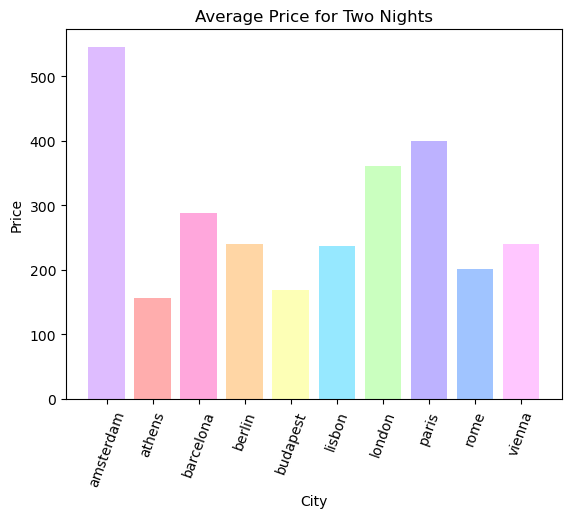

In [449]:
# calculate the average price for two nights in Amsterdam
avg_price = allcity_data.groupby('city')['realSum'].mean().round(2)

values = avg_price.array
labels = avg_price.index


fig, ax = plt.subplots()
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Price')
ax.set_xlabel('City')
ax.set_title('Average Price for Two Nights')
ax.tick_params(axis='x', rotation=70)
plt.show()

## The below calculates the average rating for airbnb listings in a given city

city
amsterdam    94.36
athens       95.10
barcelona    90.93
berlin       94.30
budapest     94.53
lisbon       91.05
london       90.32
paris        91.85
rome         93.20
vienna       93.80
Name: guest_satisfaction_overall, dtype: float64


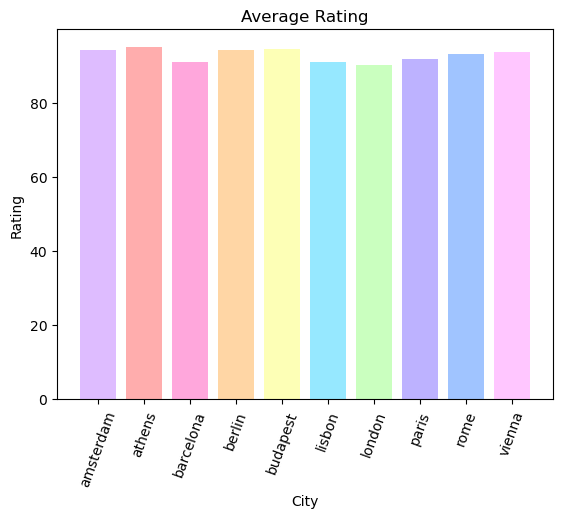

In [450]:
avg_rating = allcity_data.groupby('city')['guest_satisfaction_overall'].mean().round(2)
print(avg_rating)
values = avg_rating.array
labels = avg_rating.index


fig, ax = plt.subplots()
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Rating')
ax.set_xlabel('City')
ax.set_title('Average Rating')
ax.tick_params(axis='x', rotation=70)
plt.show()

### The below shows the average cleanliness rating for each given city

city
amsterdam    9.46
athens       9.64
barcelona    9.29
berlin       9.48
budapest     9.47
lisbon       9.36
london       9.15
paris        9.25
rome         9.52
vienna       9.47
Name: cleanliness_rating, dtype: float64


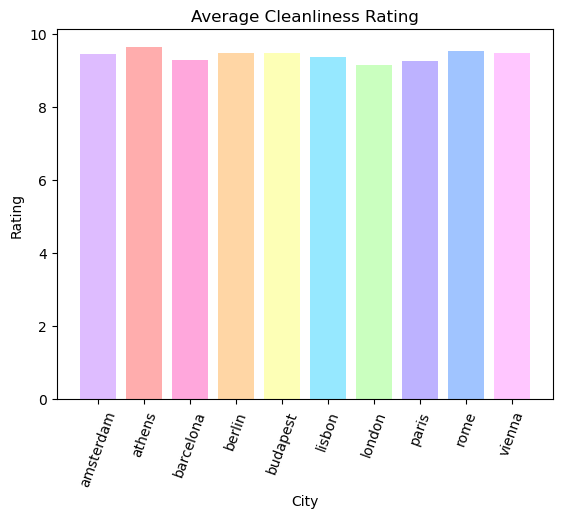

In [451]:
is_clean = allcity_data.groupby('city')['cleanliness_rating'].mean().round(2)
print(is_clean)
values = is_clean.array
labels = is_clean.index


fig, ax = plt.subplots()
ax.bar(labels, values, color=COLORS)
ax.set_ylabel('Rating')
ax.set_xlabel('City')
ax.set_title('Average Cleanliness Rating')
ax.tick_params(axis='x', rotation=70)
plt.show()